In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import re
import string

In [35]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **Sequential Model on Text Classification(CSV file)**

In [36]:
train_Data = pd.read_csv('train.csv')
test_Data = pd.read_csv('test.csv')
train_Data.head()

,title,label
0,"15 Highly Important Questions About Adulthood,...",clickbait
1,250 Nuns Just Cycled All The Way From Kathmand...,clickbait
2,"Australian comedians ""could have been shot"" du...",not-clickbait
3,Lycos launches screensaver to increase spammer...,not-clickbait
4,Fußball-Bundesliga 2008–09: Goalkeeper Butt si...,not-clickbait


**Text Cleaning**

In [37]:
def text_cleaning(text):
 text = text.lower()

 #remove numbers
#  text = re.sub('\d+','',text)

 #remove punctuations
 text = text.translate(str.maketrans('', '', string.punctuation))

 text = word_tokenize(text)

 #remove stopwords
 stopword = set(stopwords.words('english'))
 filtered_words = [word for word in text if word not in stopword]
 return ' '.join(filtered_words)

train_Data['clean_text'] = train_Data['title'].apply(text_cleaning)
test_Data['clean_text'] = test_Data['title'].apply(text_cleaning)

print(f'Original Text:\n {train_Data}')
print(f'Cleaned Text:\n {train_Data}')

Original Text:
                                                   title          label  \
0     15 Highly Important Questions About Adulthood,...      clickbait   
1     250 Nuns Just Cycled All The Way From Kathmand...      clickbait   
2     Australian comedians "could have been shot" du...  not-clickbait   
3     Lycos launches screensaver to increase spammer...  not-clickbait   
4     Fußball-Bundesliga 2008–09: Goalkeeper Butt si...  not-clickbait   
...                                                 ...            ...   
9995  Which Celebrity Should Actually Be Your Valentine      clickbait   
9996  New Orleans DirectNIC Offices, 'Outpost Crysta...  not-clickbait   
9997     Poll: Do You Actually Work For The First Order      clickbait   
9998           Steady Guard Guides Spartans Past Kansas  not-clickbait   
9999    South Thailand insurgents blamed for five bombs  not-clickbait   

                                             clean_text  
0     15 highly important questions a

In [38]:
#tokenization
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(train_Data['clean_text'])
tokenizer.fit_on_texts(test_Data['clean_text'])

#padded
padded_train = pad_sequences(tokenizer.texts_to_sequences(train_Data['clean_text']), maxlen=10, padding='post', truncating='post')
padded_test = pad_sequences(tokenizer.texts_to_sequences(test_Data['clean_text']), maxlen=10, padding='post', truncating='post')

lengths = [len(seq) for seq in tokenizer.texts_to_sequences(train_Data['clean_text'])]
print(f"Avg length: {np.mean(lengths)}, Max length: {np.max(lengths)}")
print(len(tokenizer.word_index))

# #encoding
le = LabelEncoder()
y_train = le.fit_transform(train_Data['label'])
y_test = le.fit_transform(test_Data['label'])
print(y_train)

train_Data['label'].value_counts()


Avg length: 6.3178, Max length: 16
13829
[0 0 1 ... 0 1 1]


,count
label,
not-clickbait,5002
clickbait,4998


In [39]:
#model
text_model = Sequential([
    Embedding(15000, 16, input_length=10),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')]
)

history = text_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = text_model.fit(padded_train, y_train, epochs=25, validation_split=0.2)

text_model.summary()

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7001 - loss: 0.4918 - val_accuracy: 0.9415 - val_loss: 0.1403
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9830 - loss: 0.0558 - val_accuracy: 0.9515 - val_loss: 0.1386
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9964 - loss: 0.0129 - val_accuracy: 0.9475 - val_loss: 0.1902
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9430 - val_loss: 0.2433
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9450 - val_loss: 0.2350
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9998 - loss: 8.7990e-04 - val_accuracy: 0.9450 - val_loss: 0.2873
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 1.0000 - loss: 1.0849e-04 - val_accuracy: 0.9450 - val_loss: 0.2266
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9998 - loss: 8.9633e-04 - val_accuracy

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (32, 10, 16)           │       240,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (32, 64)               │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 788,549 (3.01 MB)

 Trainable params: 262,849 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 525,700 (2.01 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step
Accuracy: 0.5000
Classification Report:
               precision    recall  f1-score   support

    clickbait       0.00      0.00      0.00        25
not-clickbait       0.50      1.00      0.67        25

     accuracy                           0.50        50
    macro avg       0.25      0.50      0.33        50
 weighted avg       0.25      0.50      0.33        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


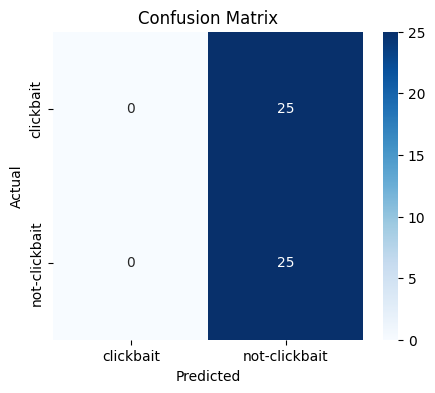

In [40]:
# Predict
y_test_true = le.transform(test_Data['label'])  # actual labels as numbers
y_pred = text_model.predict(padded_test)
y_pred_classes = (text_model.predict(y_pred) > 0.5).astype('int32').flatten()

# Accuracy
acc = accuracy_score(y_test_true, y_pred_classes)
print(f"Accuracy: {acc:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_true, y_pred_classes, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_true, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

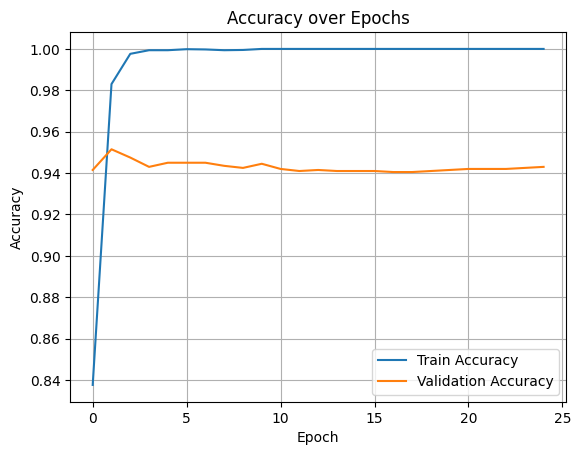

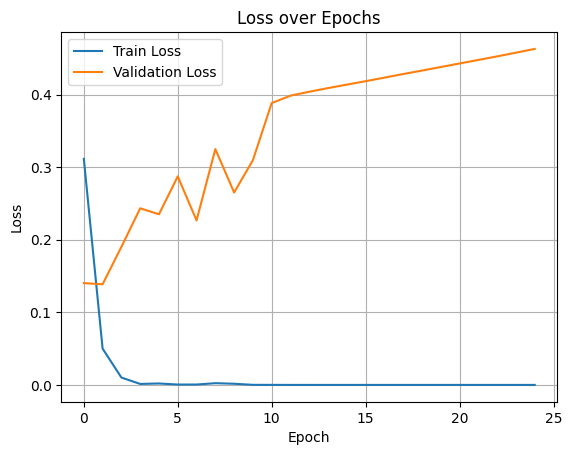

In [41]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
#ClickBait
# test_texts = ["She Opened the Box and Cried — You'll See Why"]
# test_texts = ["Top 10 Celebs Who Ruined Their Careers Instantly"]
# test_texts = ["This Simple Trick Will Help You Lose 10 Pounds Instantly"]

#Non-clickBait
# test_texts = ["NASA Discovers New Exoplanet in Habitable Zone"]
# test_texts = ["Researchers Develop New Method for Water Purification"]
# test_texts = ["Scientists Publish Results of Vaccine Trial"]
test_texts = ["Weather Forecast Predicts Heavy Rain This Weekend"]
# test_texts = ["City Council Approves New Housing Development Plan"]

test_texts = [text_cleaning(text) for text in test_texts]
test_seq = tokenizer.texts_to_sequences(test_texts)
test_pad = pad_sequences(test_seq, maxlen=8, padding='post')
pred = text_model.predict(test_pad)

pred_classes = pred.argmax(axis=1) if pred.shape[1] > 1 else (pred > 0.5).astype('int32').flatten()
print("Predicted Labels:", le.inverse_transform(pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Labels: ['not-clickbait']
